In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

578

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=614955b0548ac2dd28fa5edeb6b2b554


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=614955b0548ac2dd28fa5edeb6b2b554&q=Boston


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | chokurdakh
Processing Record 2 of Set 12 | hermanus
Processing Record 3 of Set 12 | ushuaia
Processing Record 4 of Set 12 | lavrentiya
Processing Record 5 of Set 12 | vila franca do campo
Processing Record 6 of Set 12 | humberto de campos
Processing Record 7 of Set 12 | iralaya
Processing Record 8 of Set 12 | mataura
Processing Record 9 of Set 12 | nikolskoye
Processing Record 10 of Set 12 | puerto escondido
Processing Record 11 of Set 12 | mumford
Processing Record 12 of Set 12 | east london
Processing Record 13 of Set 12 | rikitea
Processing Record 14 of Set 12 | vaitape
Processing Record 15 of Set 12 | vaini
Processing Record 16 of Set 12 | vardo
Processing Record 17 of Set 12 | acajutla
Processing Record 18 of Set 12 | mahebourg
Processing Record 19 of Set 12 | avarua
Processing Record 20 of Set 12 | busselton
Processing Record 21 of Set 12 | kodiak
Processing Record 22 of Set 12 | lilongwe


Processing Record 35 of Set 15 | ambilobe
Processing Record 36 of Set 15 | kropotkin
Processing Record 37 of Set 15 | mineiros
Processing Record 38 of Set 15 | rokytne
Processing Record 39 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 15 | eydhafushi
Processing Record 41 of Set 15 | ust-ilimsk
Processing Record 42 of Set 15 | sorland
Processing Record 43 of Set 15 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 15 | tiksi
Processing Record 45 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 15 | saskylakh
Processing Record 47 of Set 15 | mishan
Processing Record 48 of Set 15 | maragogi
Processing Record 49 of Set 15 | saint-augustin
Processing Record 50 of Set 15 | calderitas
Processing Record 1 of Set 16 | narsaq
Processing Record 2 of Set 16 | auki
Processing Record 3 of Set 16 | half moon bay
Processing Record 4 of Set 16 | nantucket
Processing Record 5 of Set 16 | genhe
Processing Record 6 of Set 16 | 

Processing Record 23 of Set 19 | akhalgori
Processing Record 24 of Set 19 | yaan
Processing Record 25 of Set 19 | jacareacanga
Processing Record 26 of Set 19 | popondetta
Processing Record 27 of Set 19 | klyuchi
Processing Record 28 of Set 19 | ponta do sol
Processing Record 29 of Set 19 | butembo
Processing Record 30 of Set 19 | salinas
Processing Record 31 of Set 19 | salina cruz
Processing Record 32 of Set 19 | provideniya
Processing Record 33 of Set 19 | anadyr
Processing Record 34 of Set 19 | belem de sao francisco
Processing Record 35 of Set 19 | muros
Processing Record 36 of Set 19 | christchurch
Processing Record 37 of Set 19 | caruray
Processing Record 38 of Set 19 | garoua
Processing Record 39 of Set 19 | south river
Processing Record 40 of Set 19 | kaeo
Processing Record 41 of Set 19 | zeya
Processing Record 42 of Set 19 | lolua
City not found. Skipping...
Processing Record 43 of Set 19 | coahuayana
Processing Record 44 of Set 19 | celestun
Processing Record 45 of Set 19 | m

Processing Record 8 of Set 23 | tautira
Processing Record 9 of Set 23 | kamaishi
Processing Record 10 of Set 23 | palana
Processing Record 11 of Set 23 | letterkenny
Processing Record 12 of Set 23 | marsh harbour
Processing Record 13 of Set 23 | tokur
Processing Record 14 of Set 23 | port lincoln
Processing Record 15 of Set 23 | usogorsk
Processing Record 16 of Set 23 | danane
Processing Record 17 of Set 23 | ormara
Processing Record 18 of Set 23 | kytlym
City not found. Skipping...
Processing Record 19 of Set 23 | kokopo
Processing Record 20 of Set 23 | palatka
Processing Record 21 of Set 23 | mandalgovi
Processing Record 22 of Set 23 | podor
Processing Record 23 of Set 23 | bambanglipuro
Processing Record 24 of Set 23 | constitucion
Processing Record 25 of Set 23 | lagoa
Processing Record 26 of Set 23 | providencia
Processing Record 27 of Set 23 | atasu
Processing Record 28 of Set 23 | menongue
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
print(len(city_data))

541


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,4.33,94,95,2.80,RU,2021-03-31 04:31:22
1,Hermanus,-34.4187,19.2345,57.00,95,11,6.51,ZA,2021-03-31 04:31:24
2,Ushuaia,-54.8000,-68.3000,41.00,70,0,8.05,AR,2021-03-31 04:30:04
3,Lavrentiya,65.5833,-171.0000,-3.91,87,82,6.11,RU,2021-03-31 04:31:24
4,Vila Franca Do Campo,37.7167,-25.4333,57.20,88,20,8.05,PT,2021-03-31 04:31:24
5,Humberto De Campos,-2.5983,-43.4611,75.07,94,100,3.91,BR,2021-03-31 04:31:25
6,Iralaya,15.0000,-83.2333,78.66,83,13,16.20,HN,2021-03-31 04:31:25
7,Mataura,-46.1927,168.8643,60.01,70,69,11.01,NZ,2021-03-31 04:31:26
8,Nikolskoye,59.7035,30.7861,37.00,87,0,6.71,RU,2021-03-31 04:31:26
9,Puerto Escondido,15.8500,-97.0667,80.10,65,1,4.83,MX,2021-03-31 04:31:26


In [13]:
# Reorder Columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-03-31 04:31:22,70.6333,147.9167,4.33,94,95,2.80
1,Hermanus,ZA,2021-03-31 04:31:24,-34.4187,19.2345,57.00,95,11,6.51
2,Ushuaia,AR,2021-03-31 04:30:04,-54.8000,-68.3000,41.00,70,0,8.05
3,Lavrentiya,RU,2021-03-31 04:31:24,65.5833,-171.0000,-3.91,87,82,6.11
4,Vila Franca Do Campo,PT,2021-03-31 04:31:24,37.7167,-25.4333,57.20,88,20,8.05
5,Humberto De Campos,BR,2021-03-31 04:31:25,-2.5983,-43.4611,75.07,94,100,3.91
6,Iralaya,HN,2021-03-31 04:31:25,15.0000,-83.2333,78.66,83,13,16.20
7,Mataura,NZ,2021-03-31 04:31:26,-46.1927,168.8643,60.01,70,69,11.01
8,Nikolskoye,RU,2021-03-31 04:31:26,59.7035,30.7861,37.00,87,0,6.71
9,Puerto Escondido,MX,2021-03-31 04:31:26,15.8500,-97.0667,80.10,65,1,4.83


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

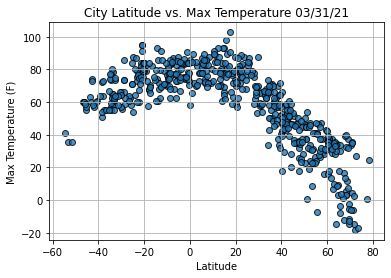

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

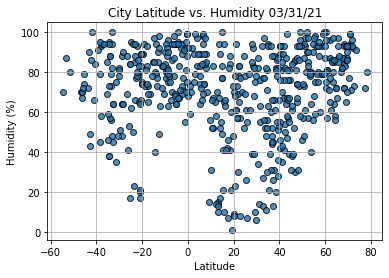

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

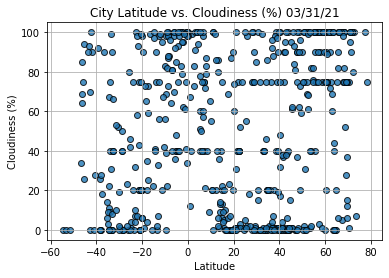

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

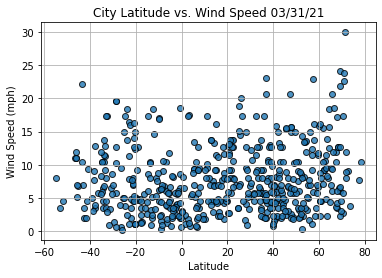

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()